In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sklearn

In [2]:
books_big = pd.read_csv('data/books2.csv', sep=',', header=0, low_memory=False)
ratings = pd.read_csv('data/ratings.csv', sep=',', header=0)
users = pd.read_csv('data/users.csv', sep=',', header=0)

In [3]:
books_big.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
books_big.columns = books_big.columns.str.lower().str.replace('-', '_')
books_big.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
users.columns = users.columns.str.lower().str.replace('-', '_')
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
ratings.columns = ratings.columns.str.lower().str.replace('-', '_')
ratings.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
ratings['book_rating'].value_counts()

book_rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64

In [9]:
print(books_big.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [10]:
books_big.isnull().sum()

isbn                   0
book_title             0
book_author            2
year_of_publication    0
publisher              2
image_url_s            0
image_url_m            0
image_url_l            3
dtype: int64

In [16]:
books_big.duplicated().sum()

0

In [17]:
users.isnull().sum()

user_id          0
location         0
age         110762
dtype: int64

In [39]:
# Excluding missings in age?
# Calculate the total number of rows
total_rows = len(users)

# Calculate the number of rows with missing values in the 'age' column
missing_age_rows = users['age'].isna().sum()

# Calculate the percentage of rows with missing values in the 'age' column
percentage_missing = (missing_age_rows / total_rows) * 100

print(f"Percentage of data that would be excluded: {percentage_missing:.2f}%")

# too many missing values, so we will not exclude them

Percentage of data that would be excluded: 39.72%


In [40]:
users.drop('age', axis=1, inplace=True)
users.head()

,user_id,location
0,1,"nyc, new york, usa"
1,2,"stockton, california, usa"
2,3,"moscow, yukon territory, russia"
3,4,"porto, v.n.gaia, portugal"
4,5,"farnborough, hants, united kingdom"


In [41]:
users.shape

(278858, 2)

In [19]:
users.duplicated().sum()

0

In [18]:
ratings.isnull().sum()

user_id        0
isbn           0
book_rating    0
dtype: int64

In [20]:
ratings.duplicated().sum()

0

#### For these two boks no authors can be found https://www.amazon.co.uk/Quiz-Masters-Earth-None/dp/0751352497, https://www.amazon.co.uk/Credit-Suisse-Managing-Personal-Wealth/dp/9627982032/ref=sr_1_1?crid=1ZD3GAL212RZG&dib=eyJ2IjoiMSJ9.UgZXUfNuNIEGkJXoAHTOAw.rcIwc5TfpSJLdjSRThEQIELLHu0EXsupGqO51xk30Hg&dib_tag=se&keywords=9627982032&qid=1724760906&s=books&sprefix=9627982032%2Cstripbooks%2C92&sr=1-1

In [14]:
print(books_big[books_big['book_author'].isnull()])

              isbn                                         book_title  \
118033  0751352497                           A+ Quiz Masters:01 Earth   
187689  9627982032  The Credit Suisse Guide to Managing Your Perso...   

       book_author year_of_publication                       publisher  \
118033         NaN                1999              Dorling Kindersley   
187689         NaN                1995  Edinburgh Financial Publishing   

                                              image_url_s  \
118033  http://images.amazon.com/images/P/0751352497.0...   
187689  http://images.amazon.com/images/P/9627982032.0...   

                                              image_url_m  \
118033  http://images.amazon.com/images/P/0751352497.0...   
187689  http://images.amazon.com/images/P/9627982032.0...   

                                              image_url_l  
118033  http://images.amazon.com/images/P/0751352497.0...  
187689  http://images.amazon.com/images/P/9627982032.0...  


#### Replacing missing publishers: Tyrant Moon: publisher is NovelBooks, Finders Keepers: publisher is NovelBooks

In [15]:
print(books_big[books_big['publisher'].isnull()])

              isbn       book_title      book_author year_of_publication  \
128890  193169656X      Tyrant Moon  Elaine Corvidae                2002   
129037  1931696993  Finders Keepers  Linnea Sinclair                2001   

       publisher                                        image_url_s  \
128890       NaN  http://images.amazon.com/images/P/193169656X.0...   
129037       NaN  http://images.amazon.com/images/P/1931696993.0...   

                                              image_url_m  \
128890  http://images.amazon.com/images/P/193169656X.0...   
129037  http://images.amazon.com/images/P/1931696993.0...   

                                              image_url_l  
128890  http://images.amazon.com/images/P/193169656X.0...  
129037  http://images.amazon.com/images/P/1931696993.0...  


In [38]:
# Define the specific ISBN numbers and the replacement publisher name
isbn_to_replace = ['193169656X', '1931696993']  # Replace with actual ISBN numbers
replacement_publisher = 'NovelBooks'

# Replace the publisher name
books_big.loc[books_big['isbn'].isin(isbn_to_replace), 'publisher'] = replacement_publisher

print(books_big[books_big['isbn'].isin(isbn_to_replace)])

              isbn       book_title      book_author year_of_publication  \
128890  193169656X      Tyrant Moon  Elaine Corvidae                2002   
129037  1931696993  Finders Keepers  Linnea Sinclair                2001   

         publisher                                        image_url_s  \
128890  NovelBooks  http://images.amazon.com/images/P/193169656X.0...   
129037  NovelBooks  http://images.amazon.com/images/P/1931696993.0...   

                                              image_url_m  \
128890  http://images.amazon.com/images/P/193169656X.0...   
129037  http://images.amazon.com/images/P/1931696993.0...   

                                              image_url_l  
128890  http://images.amazon.com/images/P/193169656X.0...  
129037  http://images.amazon.com/images/P/1931696993.0...  


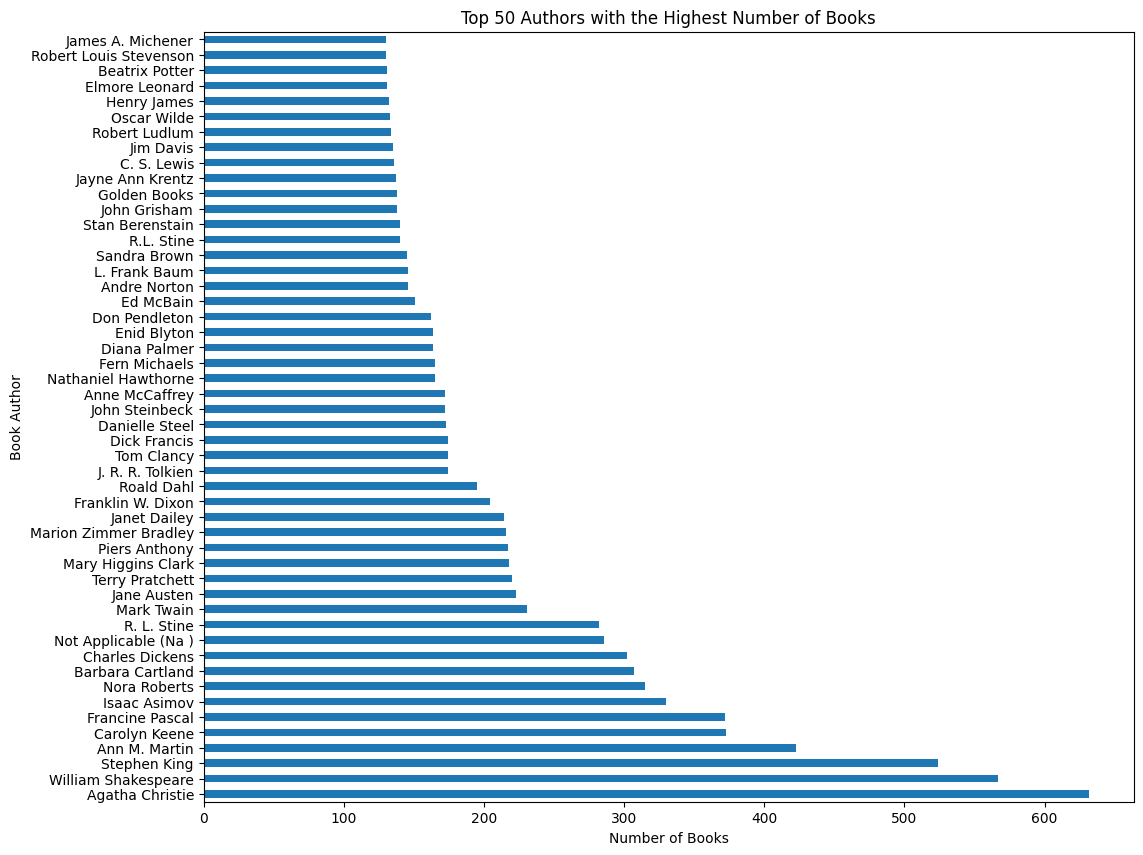

In [53]:
# Count the occurrences of each author and sort them in descending order
author_counts = books_big['book_author'].value_counts().head(50)

# Plot the top 25 authors with the highest number of books
author_counts.plot(kind='barh', figsize=(12, 10))
plt.xlabel('Number of Books')
plt.ylabel('Book Author')
plt.title('Top 50 Authors with the Highest Number of Books')
plt.show()

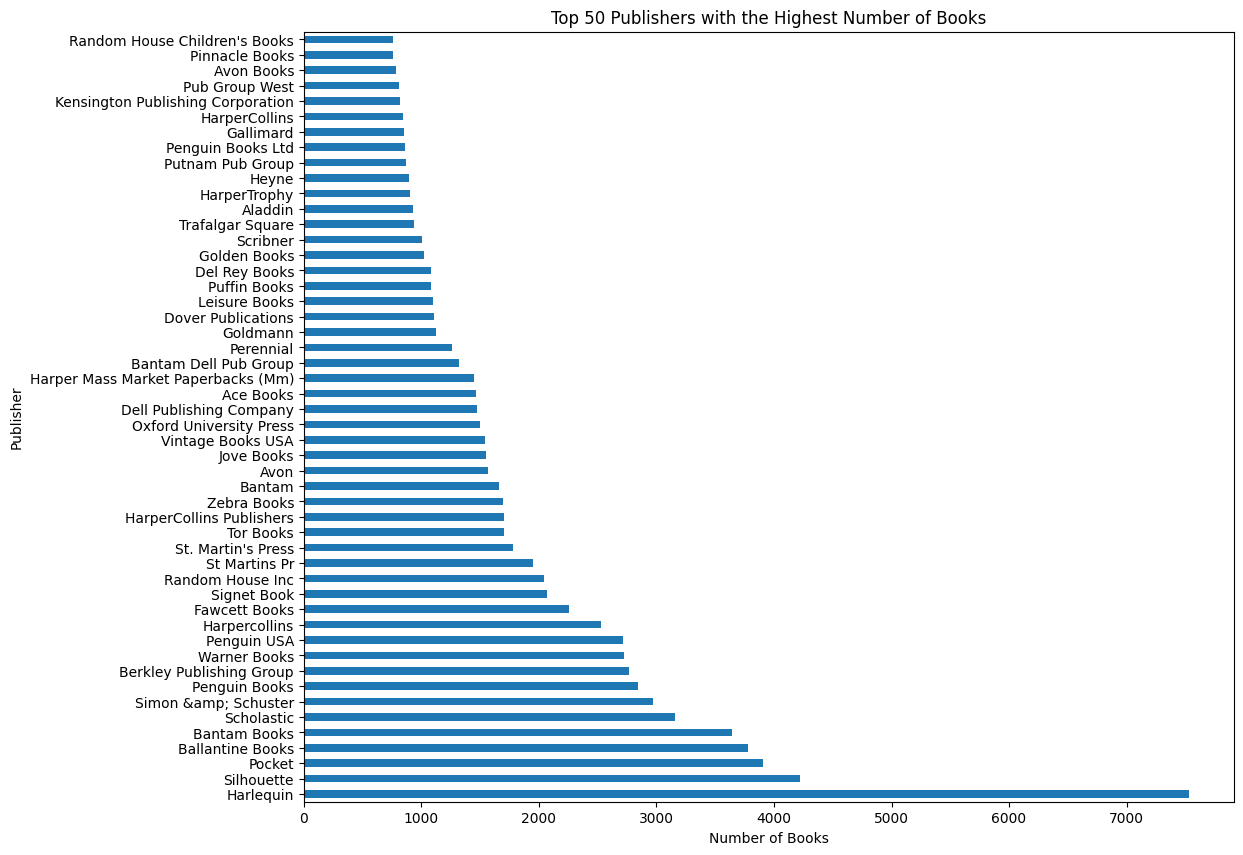

In [54]:
# Count the occurrences of each publisher and sort them in descending order
publication_counts = books_big['publisher'].value_counts().head(50)

# Plot the top 25 authors with the highest number of books
publication_counts.plot(kind='barh', figsize=(12, 10))
plt.xlabel('Number of Books')
plt.ylabel('Publisher')
plt.title('Top 50 Publishers with the Highest Number of Books')
plt.show()

In [75]:
# Publications per year

books_big[books_big['year_of_publication']=='0'].describe()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
count,4618,4618,4618,4618,4618,4618,4618,4618
unique,4618,4472,3306,1,995,4611,4611,4611
top,3150000335,Emma,Agatha Christie,0,Bantam Doubleday Dell,http://images.amazon.com/images/P/000649840X.0...,http://images.amazon.com/images/P/000649840X.0...,http://images.amazon.com/images/P/000649840X.0...
freq,1,4,34,4618,310,2,2,2


In [57]:
books_big['year_of_publication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

In [58]:
years_to_ckeck = ['0','DK Publishing Inc', 'Gallimard', '1378', '1919', '1922', '1897', '2024', '1376', '2037']   

In [59]:
books_big.loc[books_big['year_of_publication'].isin(years_to_ckeck)]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV),http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...
...,...,...,...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...


<Axes: xlabel='year_of_publication'>

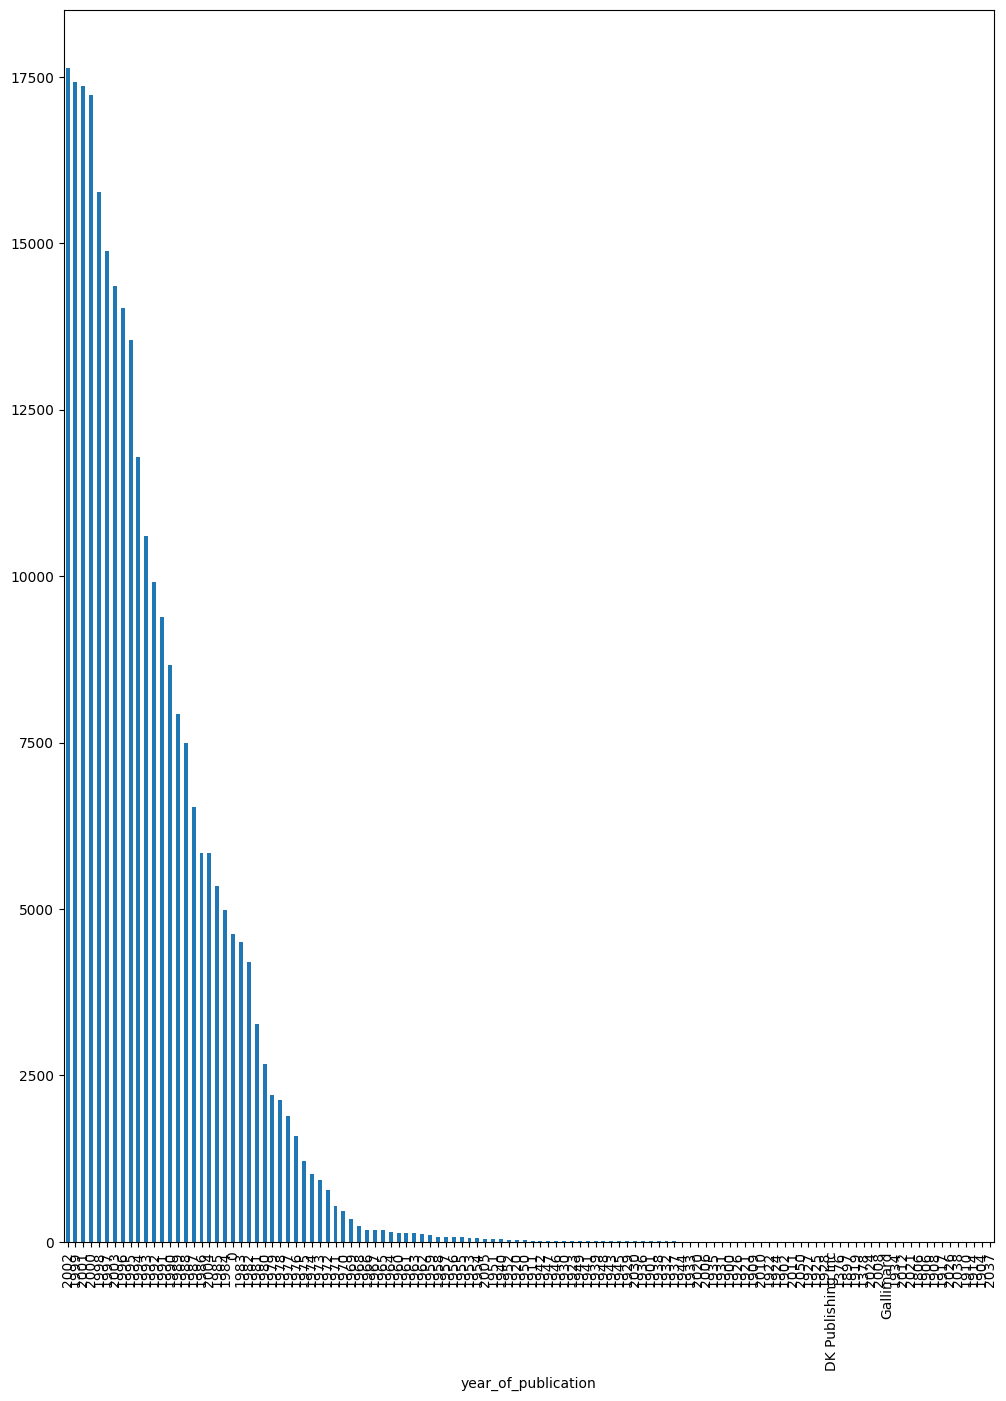

In [61]:
#plotting books per year
books_big['year_of_publication'].value_counts().plot(kind='bar', figsize=(12, 16))

In [ ]:
# what should we do with all the '0' years?

In [64]:
#Average book ratings

# Merge ratings and books_big on 'isbn'
bookRating = pd.merge(ratings, books_big, on="isbn")

# Drop unnecessary columns
bookRating.drop(columns=['image_url_s', 'image_url_m', 'image_url_l'], inplace=True)

# Calculate the average rating for each book
averageRating = bookRating.groupby('isbn')['book_rating'].mean().round(1).reset_index()
averageRating.rename(columns={'book_rating': 'average_rating'}, inplace=True)

# Merge the average ratings back with the original dataset
averageRatingdf = pd.merge(bookRating, averageRating, on='isbn')

# Remove duplicate entries
averageRatingUnique = averageRatingdf[['isbn', 'average_rating']].drop_duplicates(subset=['isbn'])

# Merge the cleaned dataset with the original books dataset
ratingBooks = pd.merge(books_big, averageRatingUnique, on='isbn', how='inner')

# Optional: If you need another DataFrame with books and their average ratings
books_with_rating = pd.merge(books_big, averageRatingUnique, on='isbn')

In [65]:
books_with_rating.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,average_rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,4.9
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,5.0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,4.3
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,0.0


In [72]:
books_with_rating[books_with_rating['average_rating']==10.0].describe()

,average_rating
count,13112.0
mean,10.0
std,0.0
min,10.0
25%,10.0
50%,10.0
75%,10.0
max,10.0


<Axes: xlabel='average_rating'>

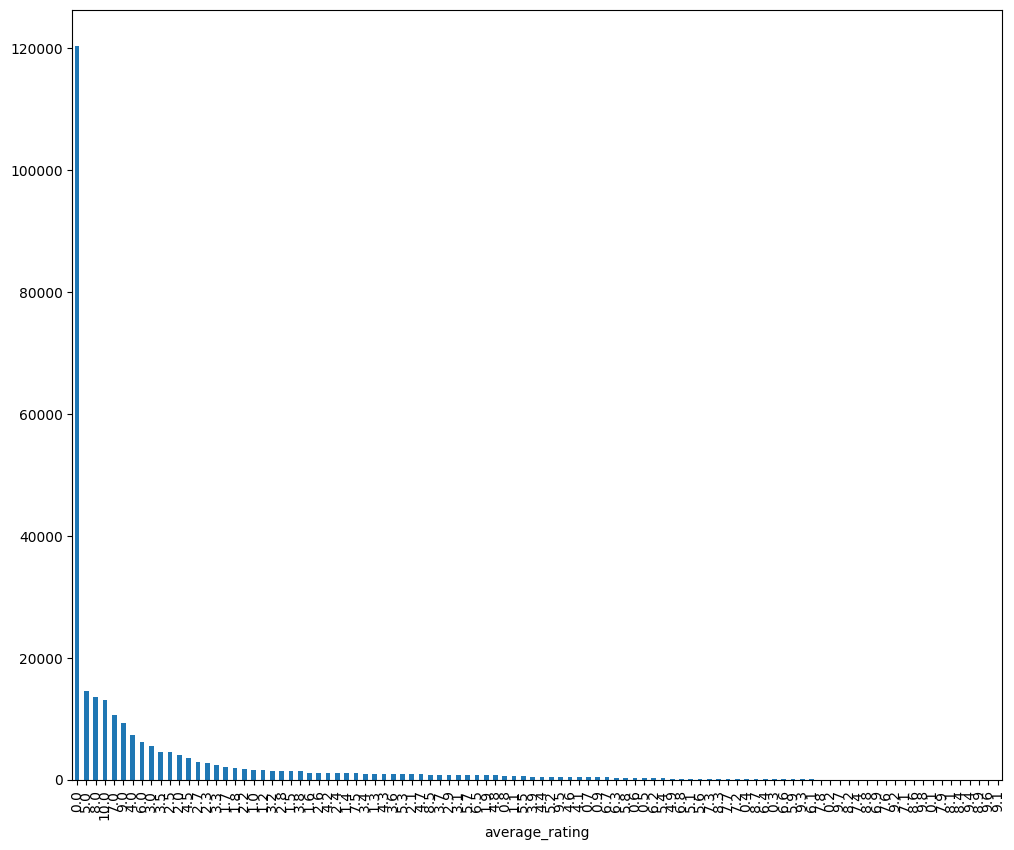

In [67]:
#plot number of books with their average ratings

books_with_rating['average_rating'].value_counts().plot(kind='bar', figsize=(12, 10))

<Axes: ylabel='book_title'>

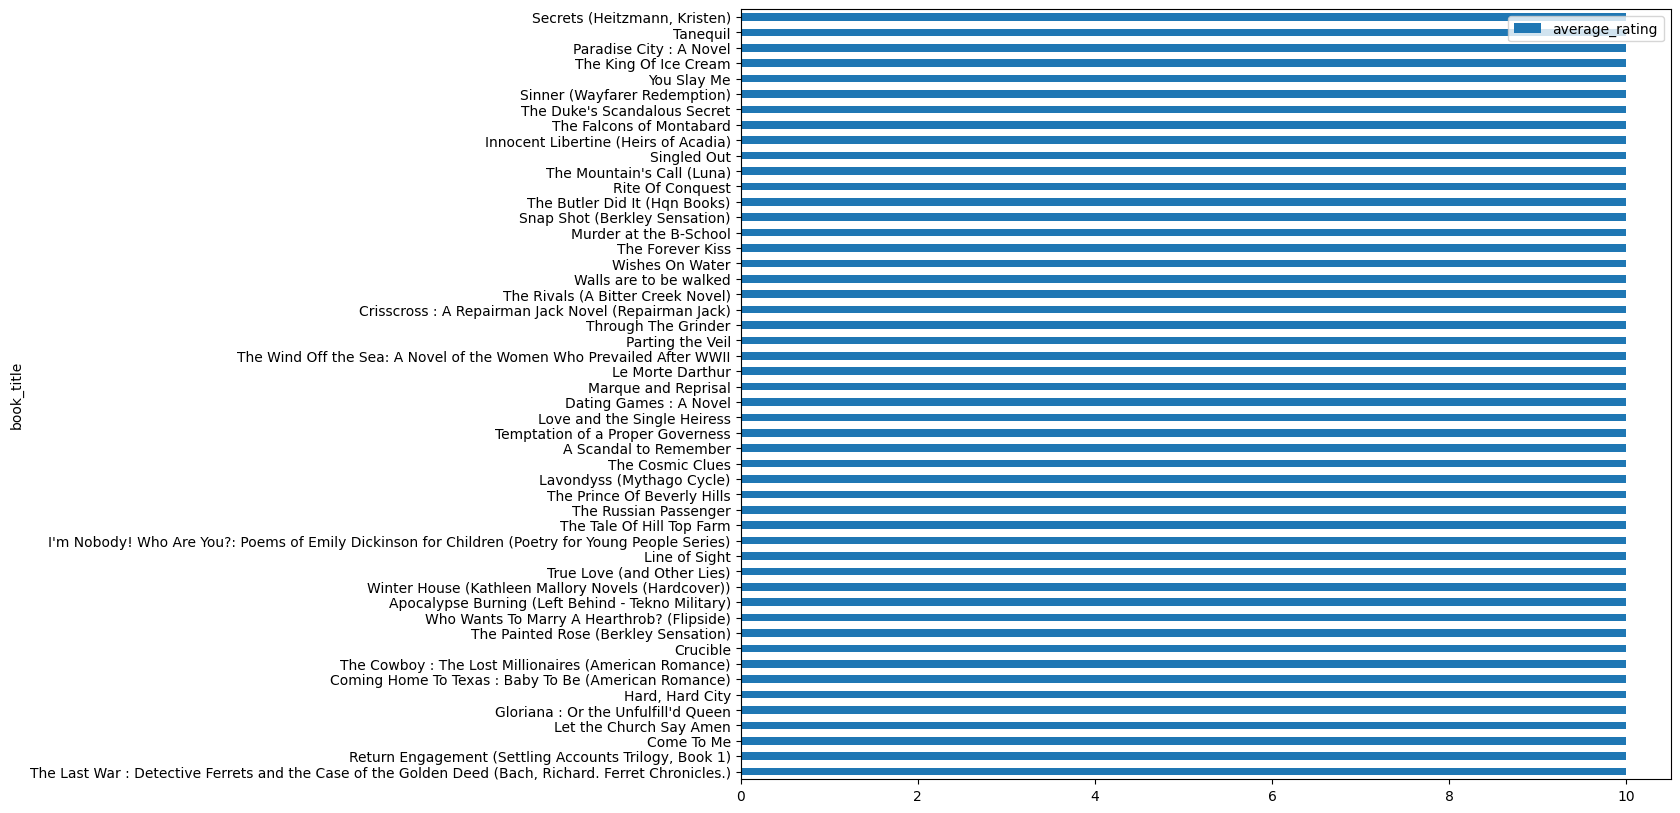

In [69]:
# plot book titles with highest ratings
books_with_rating.sort_values('average_rating', ascending=False).head(50).plot(kind='barh', x='book_title', y='average_rating', figsize=(12, 10))